In [11]:
%load_ext autoreload
%autoreload 2

from run_models import load_model
from plot_utils import *
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF

#device = 'cmod'
#dataset = 'random100'
#numeric_feats = ['ip','Wmhd','n_e','kappa','li']

device = 'synthetic'
dataset = 'synthetic100'
numeric_feats = ['ip', 'n_e', 'aminor', 'kappa', 'squareness', 'delta', 'li', 'Wmhd']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Load models and create disruption predictors

cph_model, cph_transformer = load_model('cph', device, dataset)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, numeric_feats, cph_transformer)

dcph_model, dcph_transformer = load_model('dcph', device, dataset)
dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, numeric_feats, dcph_transformer)

dsm_model, dsm_transformer = load_model('dsm', device, dataset)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, numeric_feats, dsm_transformer)

dcm_model, dcm_transformer = load_model('dcm', device, dataset)
dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, numeric_feats, dcm_transformer)

rsf_model, rsf_transformer = load_model('rsf', device, dataset)
rsf_predictor = DisruptionPredictorSM("Random Survival Forest", rsf_model, numeric_feats, rsf_transformer)

rf_model, rf_transformer = load_model('rf', device, dataset)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, numeric_feats, rf_transformer)



Loaded model from models/cph_synthetic_synthetic100.pkl
Loaded model from models/dcph_synthetic_synthetic100.pkl
Loaded model from models/dsm_synthetic_synthetic100.pkl
Loaded model from models/dcm_synthetic_synthetic100.pkl
Loaded model from models/rsf_synthetic_synthetic100.pkl
Loaded model from models/rf_synthetic_synthetic100.pkl


In [19]:
from evaluate_performance import benchmark

horizons = np.linspace(0, 0.5, 11)

au_rocs_cph = benchmark(cph_predictor, horizons, device, dataset+'_test')
#au_rocs_dcph = benchmark(dcph_predictor, horizons, device, dataset+'_test')
au_rocs_dcm = benchmark(dcm_predictor, horizons, device, dataset+'_test')
au_rocs_dsm = benchmark(dsm_predictor, horizons, device, dataset+'_test')
au_rocs_rsf = benchmark(rsf_predictor, horizons, device, dataset+'_test')
au_rocs_rf = benchmark(rf_predictor, horizons, device, dataset+'_test')

print(au_rocs_cph)
#print(au_rocs_dcph)
print(au_rocs_dcm)
print(au_rocs_dsm)
print(au_rocs_rsf)
print(au_rocs_rf)

[0.5714285714285714, 0.7857142857142857, 0.9340659340659341, 0.5879120879120879, 0.5604395604395604, 0.598901098901099, 0.5934065934065934, 0.5494505494505494, 0.5659340659340659, 0.5494505494505494, 0.5549450549450549]
[-0.0, 1.0, 0.9175824175824177, 0.8956043956043956, 0.7417582417582418, 0.5769230769230769, 0.45054945054945056, 0.4725274725274725, 0.49450549450549447, 0.47252747252747246, 0.4615384615384615]
[0.07692307692307691, 0.9560439560439561, 0.9340659340659341, 0.6648351648351649, 0.565934065934066, 0.48901098901098894, 0.4340659340659341, 0.412087912087912, 0.4230769230769231, 0.40659340659340665, 0.434065934065934]
[0.43956043956043955, 1.0, 0.9945054945054945, 0.8626373626373627, 0.6758241758241758, 0.4065934065934066, 0.33516483516483514, 0.2857142857142857, 0.3131868131868132, 0.36263736263736257, 0.2912087912087912]
[1.0, 1.0, 0.9615384615384615, 0.8846153846153846, 0.6868131868131868, 0.4505494505494505, 0.39010989010989006, 0.39010989010989006, 0.39010989010989006, 0

In [ ]:
au_rocs_dcph = benchmark(dcph_predictor, horizons, device, dataset+'_test')
print(au_rocs_dcph)

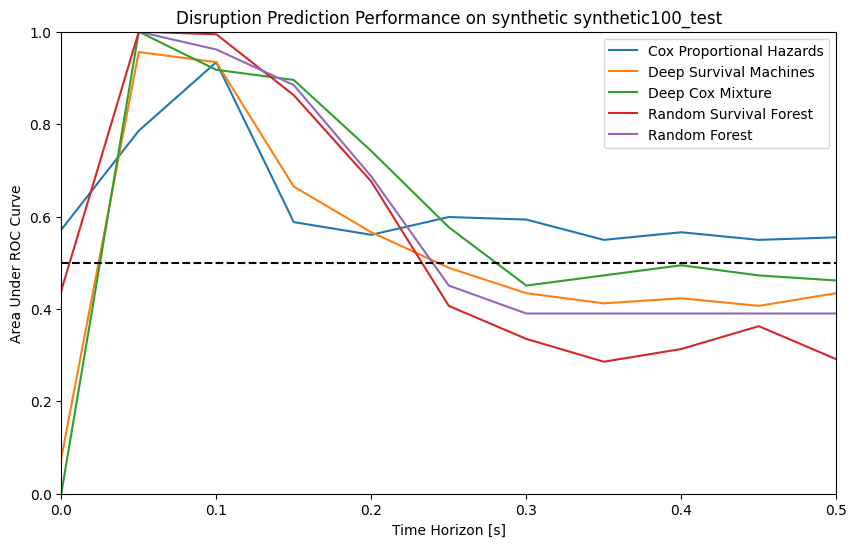

In [21]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(horizons, au_rocs_cph, label='Cox Proportional Hazards')
#plt.plot(horizons, au_rocs_dcph, label='Deep Cox Proportional Hazards')
plt.plot(horizons, au_rocs_dsm, label='Deep Survival Machines')
plt.plot(horizons, au_rocs_dcm, label='Deep Cox Mixture')
plt.plot(horizons, au_rocs_rsf, label='Random Survival Forest')
plt.plot(horizons, au_rocs_rf, label='Random Forest')

# Plot horizontal line at y = 0.5 for reference to 'random guessing'
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='black')

plt.xlim([min(horizons), max(horizons)])
plt.ylim([0, 1.0])

plt.xlabel('Time Horizon [s]')
plt.ylabel('Area Under ROC Curve')
plt.title('Disruption Prediction Performance on '+device+' '+dataset+'_test')

plt.legend()
plt.show()



In [ ]:
#plot_shot(device, dataset+'_test', 1150805022)
plot_shot(device, dataset+'_test', 1150805016)